In [53]:
from config_voting_ILSVRC12 import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

cat_idx = 4
subset_idx = subset_lb[cat_idx]
subset_ls = np.where(subset_lb==subset_idx)[0]
order_num = np.where(subset_ls==cat_idx)[0][0]

inst_per_cls = 150

simmat_file = os.path.join(Feat['cache_dir'],'simmat_mthrh049_set{}.pickle'.format(subset_idx))
with open(simmat_file, 'rb') as fh:
    mat1, mat2 = pickle.load(fh)
    
print(mat1.shape)
N = mat1.shape[0]

mat = mat1
mat_full = mat + mat.T - np.ones((N,N))
# np.fill_diagonal(mat_full, 0)
W_mat = 1. - mat_full
W_mat = W_mat[order_num*inst_per_cls:(order_num+1)*inst_per_cls, order_num*inst_per_cls:(order_num+1)*inst_per_cls]
print(W_mat.shape)

(3450, 3450)
(150, 150)


In [54]:
with open(Dataset['file_list'].format(cat_idx),'r') as fh:
    contents = fh.readlines()
    
obj_labels = [cc.strip().split('/')[0] for cc in contents]
obj_labels = np.array(obj_labels[0:inst_per_cls])

In [55]:
from sklearn.cluster import SpectralClustering
K = 4
cls_solver = SpectralClustering(n_clusters=K,affinity='precomputed', random_state=666)
lb = cls_solver.fit_predict(W_mat)
np.bincount(lb)

array([48, 47, 29, 26])

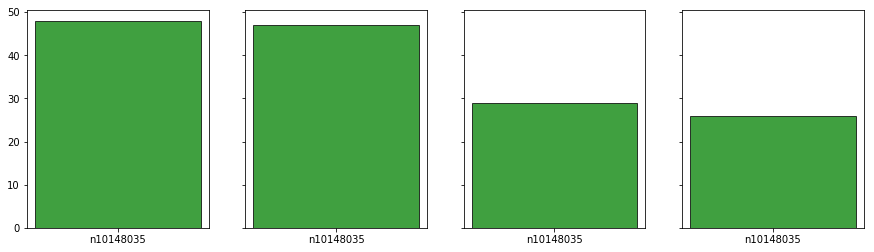

In [56]:
f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(15,4))
pos = np.arange(len(set(obj_labels)))
xlbs = list(set(obj_labels))
axes[0].set_xticks(pos)
axes[0].set_xticklabels(xlbs)
for k in range(K):
    freq = []
    for xll in xlbs:
        freq.append(sum(obj_labels[lb==k]==xll))
        
    axes[k].bar(pos, freq, color='green',alpha=0.75, edgecolor='k')

plt.show()

In [57]:
xlbs

['n10148035']

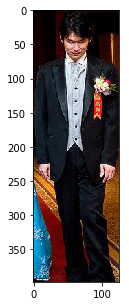

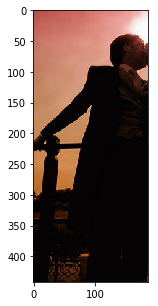

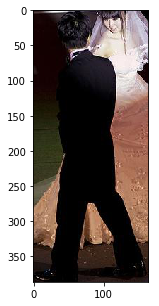

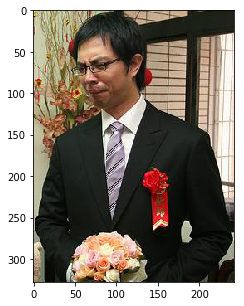

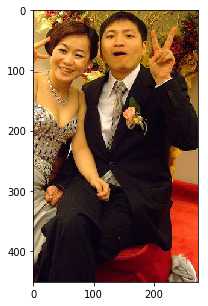

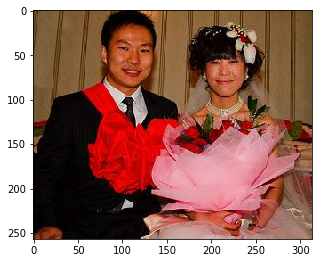

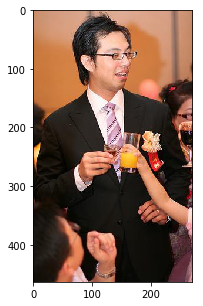

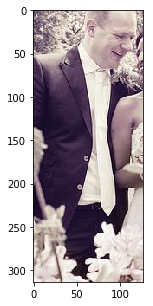

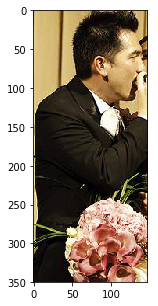

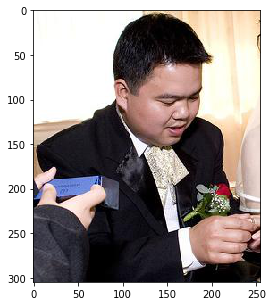

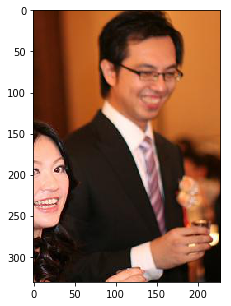

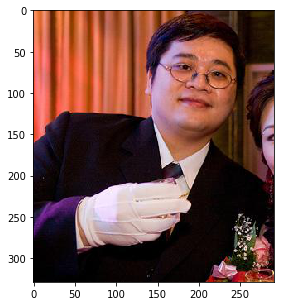

In [58]:
plt.rcParams['figure.figsize'] = (5.0, 5.0) 
file_list = np.array([cc.strip().split()[0] for cc in contents][0:inst_per_cls])

for k in range(K):
    for pp in np.random.choice(file_list[lb==k], 3, replace=False):
        img_path = os.path.join(Dataset['img_dir'], pp)
        img = cv2.imread(img_path)
        plt.imshow(img[:,:,[2,1,0]])
        plt.show()

'n02817516/n02817516_16280.JPEG\n'